### Importaci√≥n de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [6]:
ingreso1 = tienda['Precio'].sum()
ingreso2 = tienda2['Precio'].sum()
ingreso3 = tienda3['Precio'].sum()
ingreso4 = tienda4['Precio'].sum()

print(f"Ingreso total tienda 1: {ingreso1}")
print(f"Ingreso total tienda 2: {ingreso2}")
print(f"Ingreso total tienda 3: {ingreso3}")
print(f"Ingreso total tienda 4: {ingreso4}")

Ingreso total tienda 1: 1150880400.0
Ingreso total tienda 2: 1116343500.0
Ingreso total tienda 3: 1098019600.0
Ingreso total tienda 4: 1038375700.0


In [7]:
import matplotlib.pyplot as plt

# Prepara listas

ingresos = [ingreso1, ingreso2, ingreso3, ingreso4]

nombres  = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

colores  = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3']

# Gr√°fico de barras
plt.figure()
bars = plt.bar(nombres, ingresos, color=colores)

# A√±adir montos encima de cada barra
for bar, val in zip(bars, ingresos):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max(ingresos)*0.005,
        f"{val:,.0f}",                        # monto con separador de miles
        ha='center',
        va='bottom'
    )

plt.title("Ingreso total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso total")
plt.tight_layout()
plt.show()


# 2. Ventas por categor√≠a

In [9]:
import pandas as pd

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres  = ['tienda_1','tienda_2','tienda_3','tienda_4']

# Para cada tienda, extraemos la columna de categor√≠as como lista de cadenas:
listas_de_categorias = [ df['Categor√≠a del Producto'].tolist() for df in tiendas ]


# Ahora contamos cu√°ntas veces aparece cada categor√≠a:
for nombre, categorias in zip(nombres, listas_de_categorias):
    # 3) Calculamos el conteo de cada categor√≠a
    conteo = [(cat, categorias.count(cat)) for cat in set(categorias)]
    # 4) Ordenamos de mayor a menor
    conteo_ordenado = sorted(conteo, key=lambda x: x[1], reverse=True)
    # 5) Y ahora S√ç imprimimos SOLO el resumen
    print(f"\n {nombre} ‚Äî Top categor√≠as vendidas:")
    for cat, total in conteo_ordenado:
        print(f"   ‚Ä¢ {cat}: {total} unidades")


 tienda_1 ‚Äî Top categor√≠as vendidas:
   ‚Ä¢ Muebles: 465 unidades
   ‚Ä¢ Electr√≥nicos: 448 unidades
   ‚Ä¢ Juguetes: 324 unidades
   ‚Ä¢ Electrodom√©sticos: 312 unidades
   ‚Ä¢ Deportes y diversi√≥n: 284 unidades
   ‚Ä¢ Instrumentos musicales: 182 unidades
   ‚Ä¢ Libros: 173 unidades
   ‚Ä¢ Art√≠culos para el hogar: 171 unidades

 tienda_2 ‚Äî Top categor√≠as vendidas:
   ‚Ä¢ Muebles: 442 unidades
   ‚Ä¢ Electr√≥nicos: 422 unidades
   ‚Ä¢ Juguetes: 313 unidades
   ‚Ä¢ Electrodom√©sticos: 305 unidades
   ‚Ä¢ Deportes y diversi√≥n: 275 unidades
   ‚Ä¢ Instrumentos musicales: 224 unidades
   ‚Ä¢ Libros: 197 unidades
   ‚Ä¢ Art√≠culos para el hogar: 181 unidades

 tienda_3 ‚Äî Top categor√≠as vendidas:
   ‚Ä¢ Muebles: 499 unidades
   ‚Ä¢ Electr√≥nicos: 451 unidades
   ‚Ä¢ Juguetes: 315 unidades
   ‚Ä¢ Electrodom√©sticos: 278 unidades
   ‚Ä¢ Deportes y diversi√≥n: 277 unidades
   ‚Ä¢ Libros: 185 unidades
   ‚Ä¢ Instrumentos musicales: 177 unidades
   ‚Ä¢ Art√≠culos para el hogar: 177 u

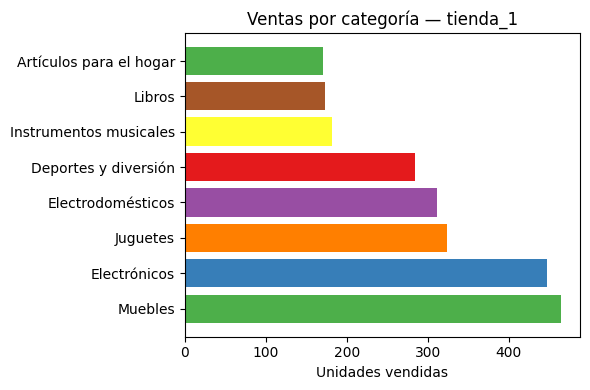

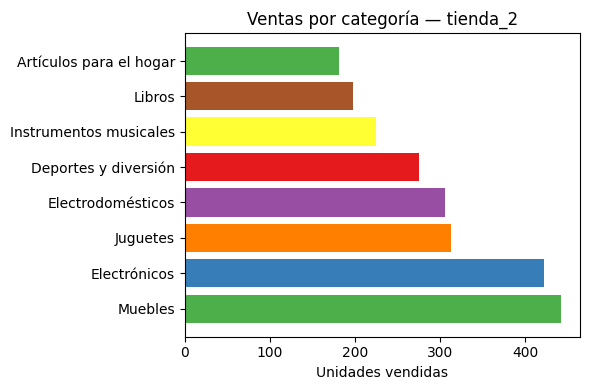

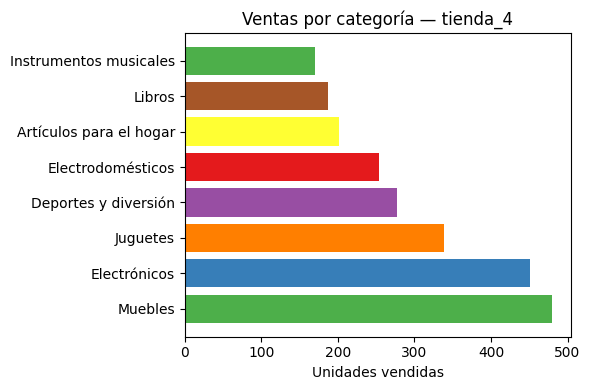

In [10]:
import matplotlib.pyplot as plt

colores_bar = ['#4daf4a','#377eb8','#ff7f00','#984ea3','#e41a1c','#ffff33','#a65628']

for nombre, categorias in zip(nombres, listas_de_categorias):
    # c√°lculo de conteo
    conteo = [(cat, categorias.count(cat)) for cat in set(categorias)]
    etiquetas, valores = zip(*sorted(conteo, key=lambda x: x[1], reverse=True))

    # gr√°fico de barras horizontales
    plt.figure(figsize=(6,4))
    plt.barh(etiquetas, valores, color=colores_bar[:len(etiquetas)])
    plt.title(f"Ventas por categor√≠a ‚Äî {nombre}")
    plt.xlabel("Unidades vendidas")
    plt.tight_layout()
    plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [11]:
#Extrae la columna de calificaciones como listas de Python
listas_de_calif = [ df['Calificaci√≥n'].tolist() for df in tiendas ]

#Recorre en paralelo nombre y sus calificaciones, calculando el promedio
for nombre, califs in zip(nombres, listas_de_calif):
    # evita divisi√≥n por cero si no hubiese ventas:
    if len(califs) == 0:
        promedio = 0
    else:
        promedio = sum(califs) / len(califs)

    # Imprime el resultado
    print(f"Valoraci√≥n media en {nombre}: {promedio:.2f}")

Valoraci√≥n media en tienda_1: 3.98
Valoraci√≥n media en tienda_2: 4.04
Valoraci√≥n media en tienda_3: 4.05
Valoraci√≥n media en tienda_4: 4.00


In [12]:
import matplotlib.pyplot as plt


# Calcula la lista de promedios
promedios = [sum(cal)/len(cal) if cal else 0 for cal in listas_de_calif]

# Dibuja un gr√°fico de barras
plt.figure(figsize=(6,4))
bars = plt.bar(nombres, promedios, color=['#377eb8','#4daf4a','#ff7f00','#984ea3'])

# A√±ade etiquetas con el valor encima de cada barra
for bar, val in zip(bars, promedios):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + 0.02,
        f"{val:.2f}",
        ha='center',
        va='bottom'
    )

plt.title("Calificaci√≥n media por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificaci√≥n media")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

In [14]:
# Extrae para cada tienda la lista de productos vendidos
listas_de_productos = [ df['Producto'].tolist() for df in tiendas ]

#Recorre cada tienda y calcula:
for nombre, productos in zip(nombres, listas_de_productos):
    # a) construye tuplas (producto, cantidad)
    conteo = [(prod, productos.count(prod)) for prod in set(productos)]
    # b) obt√©n el m√°ximo y m√≠nimo de ventas
    max_ventas = max(conteo, key=lambda x: x[1])[1]
    min_ventas = min(conteo, key=lambda x: x[1])[1]
    # c) filtra los productos que empatan en m√°ximo y m√≠nimo
    mas_vendidos  = [prod for prod, cnt in conteo if cnt == max_ventas]
    menos_vendidos = [prod for prod, cnt in conteo if cnt == min_ventas]

    #Imprime los resultados
    print(f"\n‚Äî {nombre} ‚Äî")
    print(f"Productos m√°s vendidos ({max_ventas} unidades): {mas_vendidos}")
    print(f"Productos menos vendidos ({min_ventas} unidades): {menos_vendidos}")


‚Äî tienda_1 ‚Äî
Productos m√°s vendidos (60 unidades): ['TV LED UHD 4K', 'Microondas', 'Armario']
Productos menos vendidos (33 unidades): ['Auriculares con micr√≥fono', 'Celular ABXY']

‚Äî tienda_2 ‚Äî
Productos m√°s vendidos (65 unidades): ['Iniciando en programaci√≥n']
Productos menos vendidos (32 unidades): ['Juego de mesa']

‚Äî tienda_3 ‚Äî
Productos m√°s vendidos (57 unidades): ['Kit de bancas']
Productos menos vendidos (35 unidades): ['Bloques de construcci√≥n']

‚Äî tienda_4 ‚Äî
Productos m√°s vendidos (62 unidades): ['Cama box']
Productos menos vendidos (33 unidades): ['Guitarra el√©ctrica']


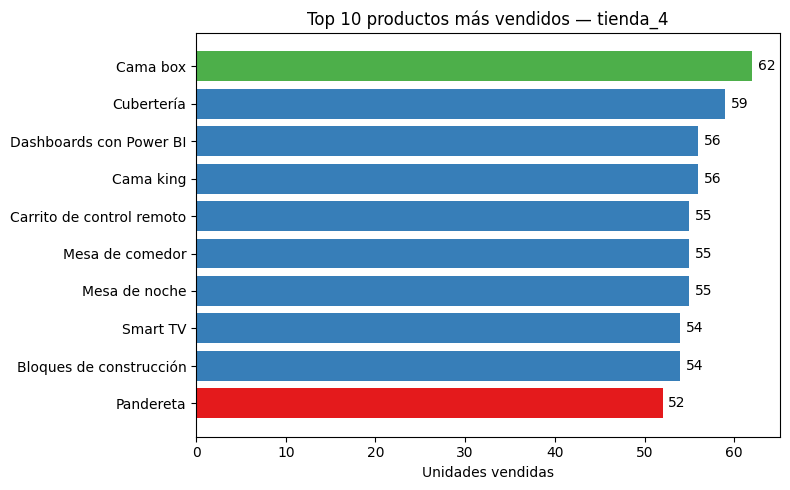

In [17]:
import matplotlib.pyplot as plt

TOP_N = 10

for nombre, productos in zip(nombres, listas_de_productos):
    # Conteo y orden descendente
    conteo = sorted(
        [(prod, productos.count(prod)) for prod in set(productos)],
        key=lambda x: x[1],
        reverse=True
    )[:TOP_N]
    etiquetas, valores = zip(*conteo)

    # Definir colores: verde al primero, rojo al √∫ltimo, azul al resto
    colores = [
        '#4daf4a' if i == 0 else
        '#e41a1c' if i == TOP_N-1 else
        '#377eb8'
        for i in range(TOP_N)
    ]

    # Dibujar gr√°fico horizontal
    plt.figure(figsize=(8, 5))
    bars = plt.barh(etiquetas, valores, color=colores)
    plt.gca().invert_yaxis()  # mayor arriba

    # Etiquetas de valor
    for bar, val in zip(bars, valores):
        plt.text(val + max(valores)*0.01, bar.get_y() + bar.get_height()/2,
                 f"{val}", va='center')

    plt.title(f"Top {TOP_N} productos m√°s vendidos ‚Äî {nombre}")
    plt.xlabel("Unidades vendidas")
    plt.tight_layout()
    plt.show()




```
# Esto tiene formato de c√≥digo
```

# 5. Env√≠o promedio por tienda

In [18]:
# Extrae para cada tienda la lista de costos de env√≠o
listas_de_envio = [ df['Costo de env√≠o'].tolist() for df in tiendas ]

# Recorre cada tienda y calcula el promedio
for nombre, costos in zip(nombres, listas_de_envio):
    if len(costos) == 0:
        promedio = 0
    else:
        promedio = sum(costos) / len(costos)
    print(f"Env√≠o promedio en {nombre}: ${promedio:,.2f}")

Env√≠o promedio en tienda_1: $26,018.61
Env√≠o promedio en tienda_2: $25,216.24
Env√≠o promedio en tienda_3: $24,805.68
Env√≠o promedio en tienda_4: $23,459.46


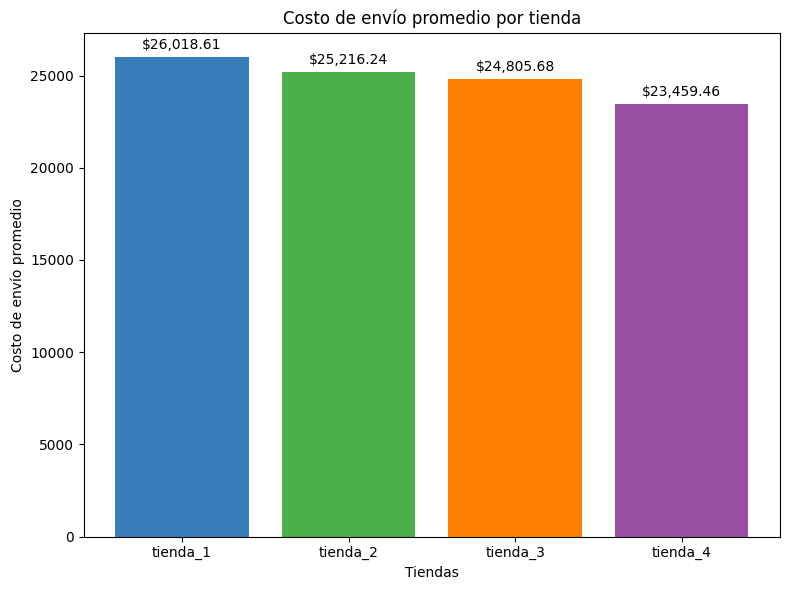

In [28]:
import matplotlib.pyplot as plt


# Calcula los promedios
promedios_envio = [
    (sum(costos)/len(costos)) if costos else 0
    for costos in listas_de_envio
]

# Dibuja un gr√°fico de barras con etiquetas de valor
plt.figure(figsize=(8,6))
bars = plt.bar(nombres, promedios_envio, color=['#377eb8','#4daf4a','#ff7f00','#984ea3'])

for bar, val in zip(bars, promedios_envio):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + max(promedios_envio)*0.01,
        f"${val:,.2f}",
        ha='center',
        va='bottom'
    )

plt.title("Costo de env√≠o promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo de env√≠o promedio")
plt.tight_layout()
plt.show()




```
# Esto tiene formato de c√≥digo
```

# 6. An√°lisis del desempe√±o geogr√°fico




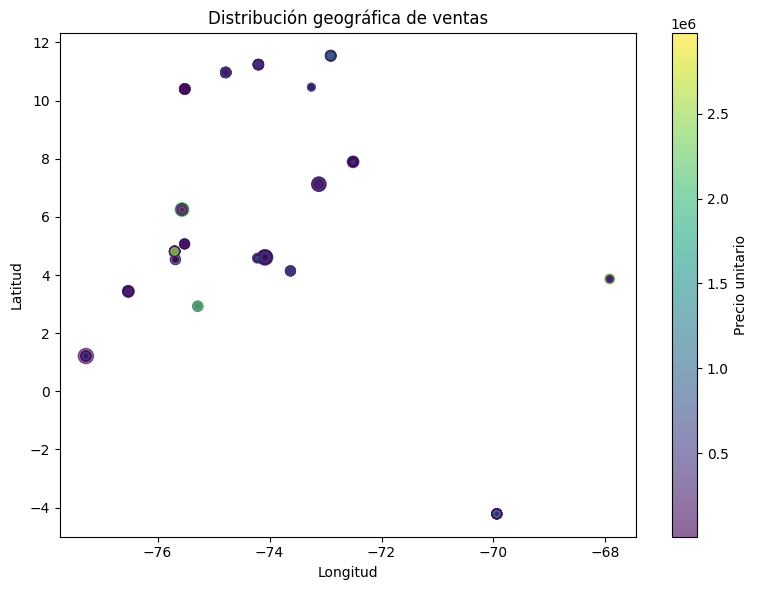

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatena en un solo DataFrame
df_all = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Scatter geogr√°fico:
#    - Eje X: longitud
#    - Eje Y: latitud
#    - Color: precio unitario
#    - Tama√±o: cantidad de cuotas (proxy de volumen)
plt.figure(figsize=(8,6))
sc = plt.scatter(
    df_all['lon'],
    df_all['lat'],
    c=df_all['Precio'],
    s=df_all['Cantidad de cuotas'] * 5,
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(sc, label='Precio unitario')
plt.title("Distribuci√≥n geogr√°fica de ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.tight_layout()
plt.show()


```
# Esto tiene formato de c√≥digo
```

# 7. üìä Informe Final de An√°lisis de Tiendas

1. Introducci√≥n

El objetivo de este an√°lisis es determinar cu√°l de las cuatro tiendas evaluadas representa la mejor oportunidad de venta para el Sr. Juan. Para ello, se recopilaron y procesaron datos relevantes de ventas, calificaciones de clientes y log√≠stica de env√≠o. A trav√©s de gr√°ficos y m√©tricas clave, buscamos entregar una visi√≥n clara y objetiva que facilite la toma de decisiones estrat√©gicas fundamentadas en datos concretos.

.

üìà Desarrollo del An√°lisis

- Ingresos Totales por Tienda

Los ingresos totales se obtuvieron sumando la columna "Precio" en cada tienda. Los resultados indicaron que:

Tienda 1 gener√≥ el mayor ingreso total 1150880400.

Tienda 2 y Tienda 3 mostraron ingresos similares, un poco inferiores.

Tienda 4 tuvo el ingreso total m√°s bajo.

üëâ Lo anterior, muestra que Tienda 1 tiene el mayor volumen de ventas en t√©rminos monetarios, pero las diferencias no son muy grandes entre las primeras tres tiendas.

.

- Distribuci√≥n de Categor√≠as de Productos Vendidos

Las tiendas exhiben una clara dominancia en las categor√≠as Muebles y Electr√≥nicos, seguidas por Juguetes y Electrodom√©sticos.

Tienda 3 lidera en ventas de Muebles con 499 unidades, seguida de Tienda 4 (480) y Tienda 1 (465).

Tienda 4 destaca en Art√≠culos para el hogar, mientras que Tienda 2 tiene un desempe√±o m√°s equilibrado en categor√≠as menos populares.

üëâLa diversificaci√≥n en categor√≠as permite evaluar la amplitud del portafolio de productos de cada tienda y su capacidad para atraer diferentes segmentos.

.


Calificaci√≥n Promedio de los Clientes

La mejor calificaci√≥n la obtiene Tienda 3 con 4.05 puntos.

Le siguen Tienda 2 con 4.04, Tienda 4 con 4.00 y finalmente Tienda 1 con 3.98.

üëâ Las calificaciones indican la percepci√≥n del cliente sobre calidad y servicio, aspecto crucial para la fidelizaci√≥n y sostenibilidad.

.

- Productos M√°s y Menos Vendidos

Tienda 1: Productos m√°s vendidos incluyen TV LED UHD 4K, Microondas y Armario (60 unidades). Los menos vendidos son Auriculares con micr√≥fono y Celular ABXY (33 unidades).

Tienda 2: Iniciando en programaci√≥n domina con 65 unidades vendidas. Producto menos vendido es Juego de mesa (32 unidades).

Tienda 3: Kit de bancas es el m√°s vendido con 57 unidades, mientras que Bloques de construcci√≥n es el menos vendido (35 unidades).

Tienda 4: Lidera con Cama box (62 unidades), y Guitarra el√©ctrica es el menos vendido (33 unidades).

 üëâ Esto evidencia un mix variado donde cada tienda tiene productos estrella y algunos con baja rotaci√≥n, lo cual impacta la gesti√≥n de inventarios y las estrategias comerciales.

.

Costo de Env√≠o Promedio

Los costos de env√≠o promedio van desde 23.459 en Tienda 4 hasta 26.018 en Tienda 1.

Tienda 4 presenta el costo log√≠stico m√°s bajo, lo que puede favorecer sus m√°rgenes de ganancia.

Tienda 3 y Tienda 2 tienen costos intermedios.

üëâ Este aspecto es fundamental para evaluar la rentabilidad neta despu√©s de gastos de log√≠stica.

.

Conclusi√≥n y Recomendaci√≥n

Tras analizar los ingresos, la satisfacci√≥n del cliente, la diversidad y rotaci√≥n de productos y los costos log√≠sticos, se recomienda que el Sr. Juan enfoque su venta en Tienda 3 por los siguientes motivos:

Es la tienda con la mejor calificaci√≥n promedio de clientes, lo que implica alta satisfacci√≥n y potencial fidelizaci√≥n.

Aunque no es la que genera mayores ingresos totales (ocupa el tercer lugar), mantiene ingresos cercanos a las tiendas l√≠deres, asegurando volumen.

Tiene un mix equilibrado de productos m√°s y menos vendidos, facilitando una gesti√≥n de inventarios estable.

El costo de env√≠o promedio es moderado, optimizando la rentabilidad.

Tienda 1, si bien lidera en ingresos, tiene la calificaci√≥n promedio m√°s baja y un costo de env√≠o alto, lo que podr√≠a afectar su desempe√±o a largo plazo.

Tienda 4 tiene costos log√≠sticos m√°s bajos y buen mix de productos, pero sus ingresos totales son los m√°s bajos.

Tienda 2 mantiene buen balance, aunque sus productos m√°s vendidos est√°n menos diversificados.









```
# Esto tiene formato de c√≥digo
```

# 8. üìñ README üìñ